In [356]:
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

In [627]:
std_pd=pd.read_csv('/Users/golf/Downloads/exp_all_digit/digit_3/test/plots/var_at_epoch1.csv').apply(lambda x:np.sqrt(x))
mean_pd=pd.read_csv('/Users/golf/Downloads/exp_all_digit/digit_3/test/plots/mean_at_epoch1.csv')

In [628]:
std_ab=np.array(std_pd[std_pd.labels==1]['var'])
mean_ab=np.array(mean_pd[mean_pd.labels==1]['scores'])
std_n=np.array(std_pd[std_pd.labels==0]['var'])
mean_n=np.array(mean_pd[mean_pd.labels==0]['scores'])

In [629]:
scores = np.concatenate([mean_n, mean_ab])
stds = np.concatenate([std_n, std_ab])
labels = np.concatenate([np.zeros_like(mean_n),np.ones_like(mean_ab)])

# get score

In [815]:
def get_prob_dict(scores, labels):
    thre = np.arange(np.min(scores), np.max(scores), 0.0005)
    normal_hist = np.histogram(scores[labels==0], range=(np.min(scores), np.max(scores)), bins=200)
    abnormal_hist = np.histogram(scores[labels==1], range=(np.min(scores), np.max(scores)), bins=200)
    threshold = normal_hist[1]
    prob = abnormal_hist[0]/(normal_hist[0]+abnormal_hist[0])
    prob[np.isnan(prob)] = 1
    return prob, threshold[:-1]

In [816]:
prob, threshold = get_prob_dict(scores, labels)

/Users/golf/anaconda3/envs/bdl_2019f_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [817]:
def predict(score, std, threshold, prob, n_sample=100):
    output = np.random.normal(score, std, n_sample)
    out_prob = np.zeros_like(output)
    for i, o in enumerate(output):
        out_prob[i] = prob[np.argmin(np.abs(threshold-o))]
    return out_prob

In [838]:
probs = []
probs.append(predict(0.0512832999999996, 0.01115689, threshold, prob, 100))

for _ in range(9):
    n_mean = mean_n[np.random.randint(mean_n.shape[0])]
    n_std = std_n[mean_n==n_mean]
    probs.append(predict(n_mean, n_std, threshold, prob, 100))

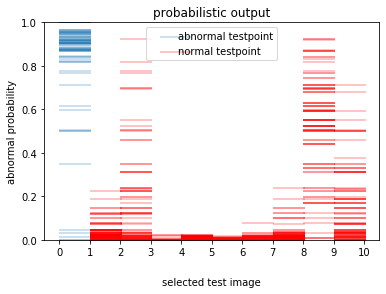

In [851]:
plt.scatter(np.zeros_like(probs[0],dtype=np.int), probs[0], s=1000, alpha=0.3, marker=1, label="abnormal testpoint")
for i, pb in enumerate(probs[1:]):
    if i==0:
        plt.scatter(np.ones_like(pb,dtype=np.int) * (i+1), pb, s=1000, alpha=0.3, marker=1,c='r', label="normal testpoint")
    else:
        plt.scatter(np.ones_like(pb,dtype=np.int) * (i+1), pb, s=1000, alpha=0.3, marker=1,c='r')
    plt.xticks(np.arange(0, 11, 1))
    plt.ylim(0,1)
plt.legend()
plt.title("probabilistic output")
plt.xlabel("selected test image", labelpad=20)
plt.ylabel("abnormal probability")
plt.savefig("prob_output.png", dpi=300)